# Quick Start using Logistic Regression

## Logistic Regression:
Logistic Regression is a classification technique. Logistic regression calculates a linear boundary between the classes. Logistic regression can be mathematically represented as follows:

$$h = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$$

$$z = \frac{1}{1+{e}^{h(x)}}$$

If z>0.5 then this example is classified as positive else it is classified as negative. In the above equations only unknown we need to calculate is W, the parameter vector. W can be calculated by using Gradient Descent optimization technique where we start with a random values for W and start changing it using the gradient of the error function. Error function gives the difference between actual output and current output. To learn more about Gradient descent and other optimization techniques you can check this [tutorial]() on optimization techniques.   

We assume you finished yann setup before starting this tutorial. If you haven't done it already, you can follow [Installation Guide](http://yann.readthedocs.io/en/master/setup.html) for yann setup. To install in a quick fashion without much dependencies run the follwing command:
<pre><code>pip install git+git://github.com/ragavvenkatesan/yann.git</pre></code>
If there was an error with installing **skdata**, you might want to install **numpy** and **scipy** independently first and then run the above command. Note that this installer, does not enable a lot of options of the toolbox for which you need to go through the complete install described at the Installation Guide page.

The easiest way to get going with Yann is to follow this quick start guide. If you are not satisfied and want a more detailed introduction to the toolbox, you may refer to the [Tutorials](http://yann.readthedocs.io/en/master/tutorial.html#tutorial) and the [Structure of the Yann network](http://yann.readthedocs.io/en/master/organization.html#organization). This tutorial was also presented in CSE591 at ASU and the video of the presentation is available.


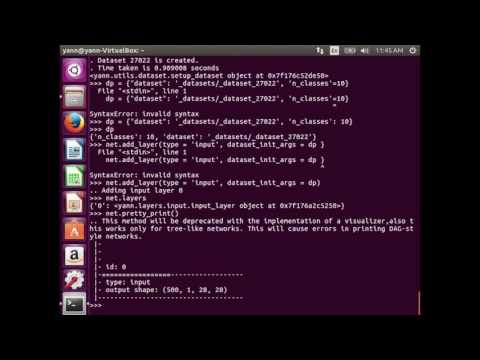

In [51]:
from IPython.display import YouTubeVideo
YouTubeVideo("0NFvfg8CItQ",theme="light", color="red")

Verify that the installation of theano is indeed version 0.9 or greater by doing the following in a python shell

In [1]:
import theano
theano.__version__

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 750 Ti (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5110)


'0.9.0'

If the version was not 0.9, you can install 0.9 by doing the following:
<pre><code>pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git
</code></pre>


The start and the end of Yann toolbox is the ***`network`*** module. The ***`yann.network.network`*** object is where all the magic happens. Run the the following code to import ***`network`*** module and create a ***`network`*** object.

In [2]:
from yann.network import network
net = network()

. Initializing the network


*Voila!* We have thus created a new network. The network doesn’t have any layers or modules in it. It be seen verified by probing into ***`net.layers`*** property of the ***`net`*** object.

In [3]:
net.layers

{}

This will produce an output which is essentially an empty dictionary {} because we did not add any layers to the network. Let’s add some layers! Before we do that, we need some data to train the network. The toolbox comes with a port to [skdata](https://github.com/jaberg/skdata) the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten characters can be built using this port. 


To cook a mnist dataset for yann run the following code:

In [4]:
from yann.special.datasets import cook_mnist
data = cook_mnist()

. Setting up dataset 
.. setting up skdata
... Importing mnist from skdata
.. setting up dataset
.. training data
.. validation data 
.. testing data 
. Dataset 40609 is created.
. Time taken is 0.89323 seconds


Running this code will print a statement to the following effect ***``>>Dataset xxxxx`` is created***. The five digits marked ***``xxxxx``*** in the statement is the codeword for the dataset. The actual dataset is located now at ***``_datasets/_dataset_xxxxx/``*** from the directory from where this code was called. Mnist dataset is imported, coverted to a format consumable by yann and stored at this location. Refer to the [Tutorials](http://yann.readthedocs.io/en/master/tutorial.html#tutorial) on how to convert your own dataset for yann. You can check the location of the dataset using ***`data.datastet_location()`*** function.

In [5]:
data.dataset_location()

'_datasets/_dataset_40609'

The first layer that we need to add to our network now is an input layer. Every ***``input``*** layer requries a dataset to be associated with it. Let us create this layer.

>***`Before you run the following code replace XXXXX with the dataset codeword we just generated.`*** 

In [7]:
dataset_params  = { "dataset": data.dataset_location(), "n_classes" : 10 }
net.add_layer(type = "input", dataset_init_args = dataset_params)

.. Adding input layer 1


This piece of code creates and adds a new ***`datastream`*** module to the ***`net`*** and wires up the newly added ***`input`*** layer with this ***`datastream`***. Confirm this by checking ***`net.datastream`***. Let us now build a ***`classifier`*** layer. The default classifier that yann is setup with is the logistic regression classifier. Refer to [Toolbox Documentation](http://yann.readthedocs.io/en/master/yann/index.html#yann) or [Tutorials](http://yann.readthedocs.io/en/master/tutorial.html#tutorial) for other types of layers. Let us create a this ***`classifier`*** layer for now.

In [8]:
net.add_layer(type = "classifier" , num_classes = 10)
net.add_layer(type = "objective")

.. Adding classifier layer 2
.. Adding flatten layer 3
.. Adding objective layer 4


The layer ***`objective`*** creates the loss function from the classifier that can be used as a learning metric. It also provides a scope for other modules such as the optimizer module. Refer [Structure of the Yann network](http://yann.readthedocs.io/en/master/organization.html#organization) and [Toolbox Documentation](http://yann.readthedocs.io/en/master/yann/index.html#yann) for more details on modules. Now that our network is created and constructed we can check the layers in our network with ***`net.layers`***.

In [9]:
net.layers

{'1': <yann.layers.input.input_layer at 0x7f236b0baed0>,
 '2': <yann.layers.output.classifier_layer at 0x7f236afbe890>,
 '3': <yann.layers.flatten.flatten_layer at 0x7f236b014250>,
 '4': <yann.layers.output.objective_layer at 0x7f236af74610>}

The keys of the dictionary such as ***`'1'`***, ***`'0'`*** and ***`'2'`*** are the ***`id`*** of the layer. We could have created a layer with a custom id by supplying an id argument to the ***`add_layer`*** method. To get a better idea of how the network looks like, you can use the ***`pretty_print`*** mehtod in yann.

In [10]:
net.pretty_print()

.. This method will be deprecated with the implementation of a visualizer,also this works only for tree-like networks. This will cause errors in printing DAG-style networks.
 |-
 |-
 |-
 |- id: 1
 |-=================------------------
 |- type: input
 |- output shape: (500, 1, 28, 28)
 |------------------------------------
          |-
          |-
          |-
          |- id: 3
          |-=================------------------
          |- type: flatten
          |- output shape: (500, 784)
          |------------------------------------
                   |-
                   |-
                   |-
                   |- id: 2
                   |-=================------------------
                   |- type: classifier
                   |- output shape: (500, 10)
                   |------------------------------------
                            |-
                            |-
                            |-
                            |- id: 4
                            |-===

Now our network is finally ready to be trained. Before training, we need to build an ***`optimizer`*** and other tools, but for now let us use the default ones. Once all of this is done, yann requires that the network be *`cooked`*. For more details on cooking refer [Structure of the Yann network](http://yann.readthedocs.io/en/master/organization.html#organization). For now let us imagine that cooking a network will finalize the wiring, architecture, cache and prepare the first batch of data, prepare the modules and in general prepare the network for training using back propagation.

In [11]:
net.cook()

.. Cooking the network
.. Setting up the visualizer
.. Setting up the resultor
.. Setting up the optimizer
.. All checks complete, cooking continues


Cooking would take a few seconds and might print what it is doing along the way. Once cooked, we may notice for instance that the network has a ***`optimizer`*** module.

In [12]:
net.optimizer

{'main': <yann.modules.optimizer.optimizer at 0x7f236a25a8d0>}

To train the model that we have just cooked, we can use the ***`train`*** function that becomes available to us once the network is cooked.

In [13]:
net.train()

. Training
. 

.. Epoch: 0 Era: 0
.. Validation accuracy : 78.76
.. Best validation accuracy


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.89302
... Learning Rate       : 0.00999999977648
... Momentum            : 0.899999976158
. 

.. Epoch: 1 Era: 0
.. Validation accuracy : 82.41
.. Best validation accuracy


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.37316
... Learning Rate       : 0.00949999969453
... Momentum            : 0.901666641235
. 

.. Epoch: 2 Era: 0
.. Validation accuracy : 83.86
.. Best validation accuracy


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.1181
... Learning Rate       : 0.00902500003576
... Momentum            : 0.903333306313
. 

.. Epoch: 3 Era: 0
.. Validation accuracy : 84.69
.. Best validation accuracy


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.973435
... Learning Rate       : 0.00857375003397
... Momentum            : 0.90499997139
.. Patience ran out lowering learning rate.
. 

.. Epoch: 4 Era: 0
.. Validation accuracy : 84.79
.. Best validation accuracy


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.915685
... Learning Rate       : 0.000814506202005
... Momentum            : 0.906666636467
.. Patience ran out lowering learning rate.
. 

.. Epoch: 5 Era: 0
.. Validation accuracy : 84.79


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.910912
... Learning Rate       : 7.73780848249e-05
... Momentum            : 0.908333301544
.. Patience ran out lowering learning rate.
. 

.. Epoch: 6 Era: 0
.. Validation accuracy : 84.78


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.91127
... Learning Rate       : 7.3509181675e-06
... Momentum            : 0.909999966621
.. Patience ran out lowering learning rate.
. 

.. Epoch: 7 Era: 0
.. Validation accuracy : 84.79


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.911304
... Learning Rate       : 6.98337203175e-07
... Momentum            : 0.911666631699
.. Patience ran out lowering learning rate.
. 

.. Epoch: 8 Era: 0
.. Validation accuracy : 84.79


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.911308
... Learning Rate       : 6.63420323121e-08
... Momentum            : 0.91333335638
.. Patience ran out lowering learning rate.
. 

.. Epoch: 9 Era: 0
.. Validation accuracy : 84.79


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.911308
... Learning Rate       : 6.30249274991e-09
... Momentum            : 0.914999961853
.. Patience ran out lowering learning rate.
. 

.. Epoch: 10 Era: 0
.. Validation accuracy : 84.79


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.911308
... Learning Rate       : 5.98736782376e-10
... Momentum            : 0.91666662693
.. Patience ran out lowering learning rate.
. 

.. Epoch: 11 Era: 0
.. Validation accuracy : 84.79


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.911308
... Learning Rate       : 5.68799937706e-11
... Momentum            : 0.918333292007
.. Patience ran out lowering learning rate.
. 

.. Epoch: 12 Era: 0
.. Validation accuracy : 84.79


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.911308
... Learning Rate       : 5.4035994429e-12
... Momentum            : 0.919999957085
.. Patience ran out lowering learning rate.
. 

.. Epoch: 13 Era: 0
.. Validation accuracy : 84.79


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.911308
... Learning Rate       : 5.13341918886e-13
... Momentum            : 0.921666622162
.. Patience ran out lowering learning rate.
. 

.. Epoch: 14 Era: 0
.. Validation accuracy : 84.79


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.911308
... Learning Rate       : 4.87674848692e-14
... Momentum            : 0.923333287239
.. Patience ran out lowering learning rate.
. 

.. Epoch: 15 Era: 0
.. Validation accuracy : 84.79


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.911308
... Learning Rate       : 4.63291107951e-15
... Momentum            : 0.924999952316
.. Patience ran out lowering learning rate.
. 

.. Epoch: 16 Era: 0
.. Validation accuracy : 84.79


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.911308
... Learning Rate       : 4.40126525025e-16
... Momentum            : 0.926666617393
.. Patience ran out lowering learning rate.
. 

.. Epoch: 17 Era: 0
.. Validation accuracy : 84.79


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.911308
... Learning Rate       : 4.18120178921e-17
... Momentum            : 0.928333282471
.. Patience ran out lowering learning rate.
. 

.. Epoch: 18 Era: 0
.. Validation accuracy : 84.79


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.911308
... Learning Rate       : 3.97214198099e-18
... Momentum            : 0.929999947548
.. Patience ran out lowering learning rate.
. 

.. Epoch: 19 Era: 0
.. Validation accuracy : 84.79


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.911308
... Learning Rate       : 3.77353462345e-19
... Momentum            : 0.931666612625
.. Patience ran out lowering learning rate.
.. Learning rate was already lower than specified. Not changing it.
.. Old learning rate was :3.5848579569e-20
.. Was trying to change to: 0.001
. 

.. Epoch: 20 Era: 1
.. Validation accuracy : 84.79


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.911308
... Learning Rate       : 3.5848579569e-20
... Momentum            : 0.933333277702
.. Early stopping
.. Training complete.Took 0.344497 minutes


This will print a progress for each epoch and will show validation accuracy after each epoch on a validation set that is independent from the training set. By default the training might run for 40 epochs: 20 on a higher learning rate and 20 more on a fine tuning learning rate.

Every layer also has an ***`layer.output`*** object. The ***`output`*** can be probed by using the ***`layer_activity`*** method as long as it is directly or in-directly associated with a ***datastream*** module through an ***`input`*** layer and the network was cooked. Let us observe the activity of the input layer for trial. Once trained we can observe this output. The layer activity will just be a ***`numpy`*** array of numbers, so let us print its shape instead.

In [14]:
net.layer_activity(id='1').shape
net.layers['1'].output_shape

(500, 1, 28, 28)

The second line of code will verify the output we produced in the first line. An interesting layer output is the output of the ***`objective`*** layer, which will give us the current negative log likelihood of the network, the one that we are trying to minimize.

In [15]:
net.layer_activity(id = '2')

array([[ 0.02283227,  0.17566282,  0.12633997, ...,  0.0147012 ,
         0.11415195,  0.01556526],
       [ 0.01736077,  0.06502438,  0.0840387 , ...,  0.03352958,
         0.40011853,  0.05375457],
       [ 0.08021914,  0.00470961,  0.08809454, ...,  0.02976757,
         0.01867468,  0.04357202],
       ..., 
       [ 0.10347021,  0.09935072,  0.11531641, ...,  0.08532751,
         0.11295684,  0.04757301],
       [ 0.0155751 ,  0.51565427,  0.12655467, ...,  0.04797259,
         0.10273987,  0.03375516],
       [ 0.01215069,  0.14803936,  0.10773655, ...,  0.02682427,
         0.3032296 ,  0.08044047]], dtype=float32)

Once we are done training, we can run the network feedforward on the testing set to produce a generalization performance result.

In [16]:
net.test()

.. Testing


| testing  100% Time: 0:00:00                                                  


.. Testing accuracy : 83.8


Congratualations, you now know how to use the yann toolbox successfully. A full-fledge code of the logistic regression that we implemented here can be found [here](https://github.com/ragavvenkatesan/yann/blob/master/pantry/tutorials/log_reg.py) . That piece of code also has in-commentary that discusses briefly other options that could be supplied to some of the function calls we made here that explain the processes better.
Hope you liked this quick start guide to the Yann toolbox and have fun!